# Context

Sail boat from the 18th century are classified depending on their missions, canons, fire power.

# Goal

Confirm this classification is meaningful

In [1]:
from contextlib  import suppress
from itertools import product
import yaml

import matplotlib.pyplot as  plt
import pandas as pd
from pandas.plotting import scatter_matrix


%matplotlib inline

# Initial exploration

In [2]:
boats = pd.read_csv('./boats.csv')
with open('./boats_src.yml') as fd:
    sources = yaml.load(fd.read())

In [3]:
sources

{1: 'wikipedia',
 4: 'shipwiki.wikispaces.com',
 5: 'http://www.plimoth.org/what-see-do/mayflower-ii/mayflower-ii-faqs',
 6: 'http://www.shtandart.com/specifications.htm',
 0: 'https://exchange.dnv.com/Exchange/main.aspx',
 2: 'Isbn 2-903708-82-7 (Bateaux traditionnels français. Reconstitutions et Répliques)',
 7: 'http://www.soic.se/en/the-ship/',
 3: 'http://www.timedesign.de/ship/ship.html',
 9: 'http://www.thebounty.com.hk/icms2/template?series=608&article=8578',
 10: 'http://www.anmm.gov.au/whats-on/vessels/hmb-endeavour',
 8: 'http://www.tallshiprose.org/info/shipspecs.html',
 11: 'http://www.salemweb.com/frndship/facts.shtml',
 12: 'http://www.flagshipniagara.org/us-brig-niagara/flagship-niagara-about/',
 13: 'http://www.slsa.sa.gov.au/fh/passengerlists/1836Buffalo.htm'}

In [4]:
boats

,ship name,class,launch date,displacement (tons) (1GRT (tonneau) = 2.83168m^3),length overall (longueur hors-tout) (Loa) (meters),Length between perpendicular (longueur entre perpendiculaires) (Lpp),Length at waterline (longueur à la ligne de flotaison) (LWL),hull length (length od deck) (longueur au pont) (LOD) (meters),Length (which one?),(longueur de carêne) (L),...,canon number /,broadside (tons) /,cruise speed (knots) /,autonomy (days),crew number,flag(s),source(s),Unnamed: 25,Unnamed: 26,Unnamed: 27
0,grace dieu,NaN,1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nina,carrack,1460,105,NaN,NaN,NaN,19,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Santa María,carrack,1460,150 tons [1],NaN,NaN,NaN,19 [1],NaN,NaN,...,4x90mm bombard [1],NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Santa_Mar%C3%ADa...,NaN,NaN,NaN
3,Peter von Danzing,NaN,1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mars/Makalös,NaN,1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Adler von Lübeck,NaN,1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Vasa,NaN,1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN
7,Batavia,indiaman,1628 [1],1200 [1],NaN,NaN,NaN,NaN,56.6 [2] [1],NaN,...,24 [1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HMS Sovereign of the Seas,NaN,1637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Stora Kronan,NaN,1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
 cols = boats.axes[1]

/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1398: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1399: RuntimeWarning: All-NaN slice encountered
  ind = np.linspace(np.nanmin(y) - 0.5 * sample_range,
/usr/lib/python3.6/site-packages/pandas/plotting/_core.py:1400: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range, 1000)


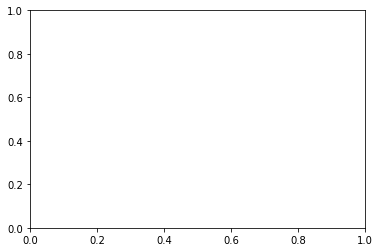

In [6]:
for col in cols:
    with suppress(Exception):
        # TODO: less broad excpetion
        # some columns do not contain numbers, other not enough value
        pd.DataFrame(boats[col]).plot(kind='kde')
        plt.show()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


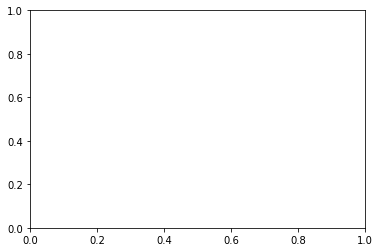

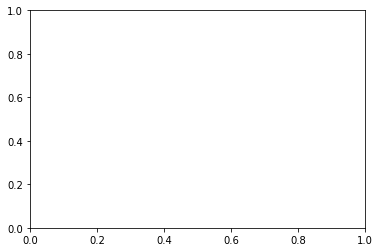

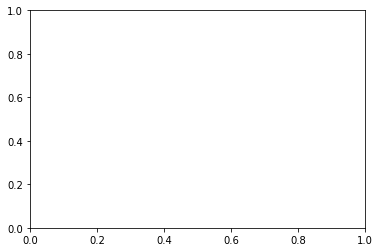

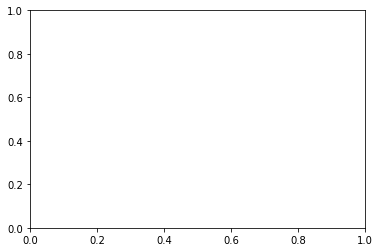

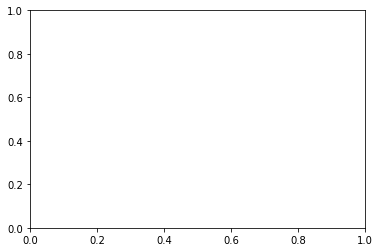

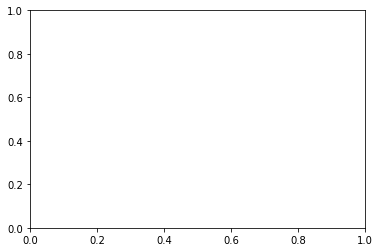

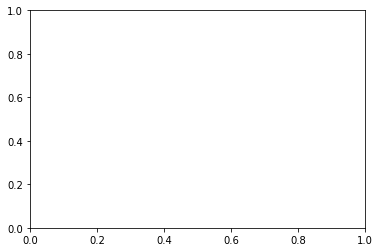

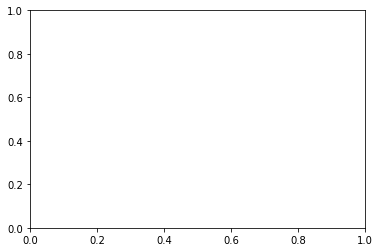

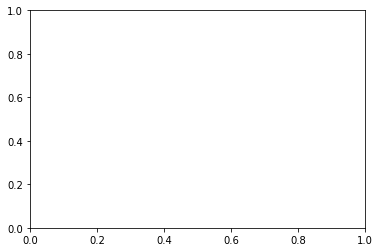

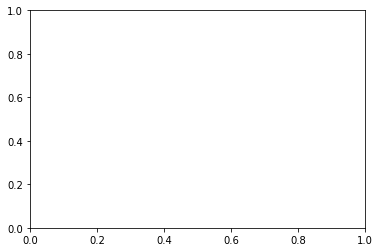

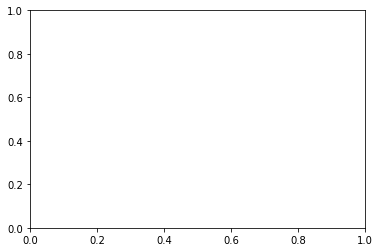

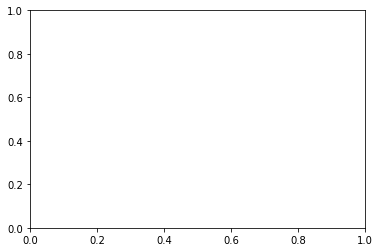

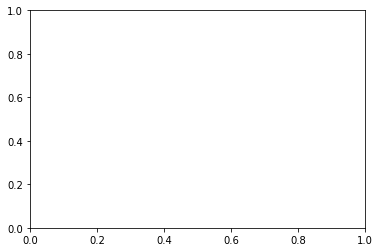

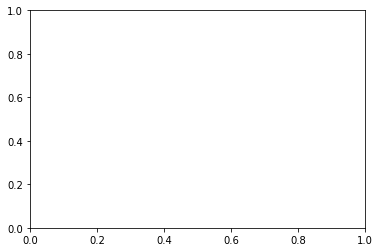

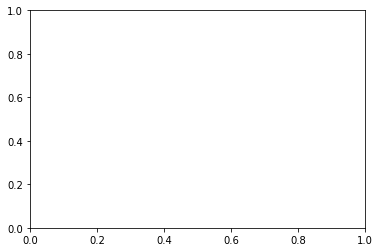

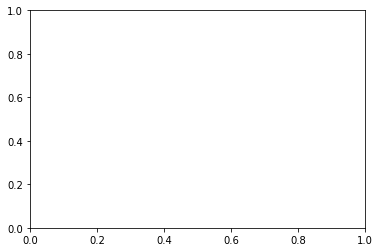

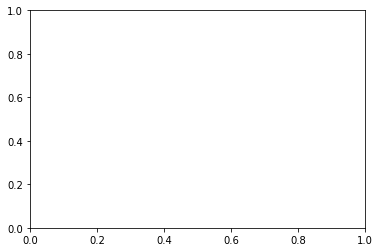

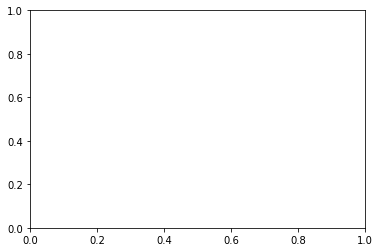

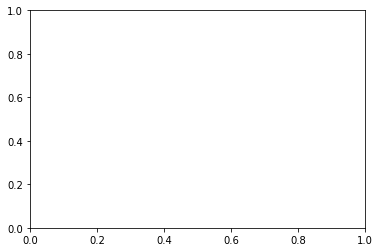

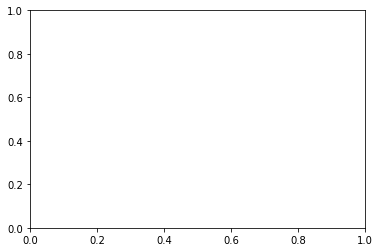

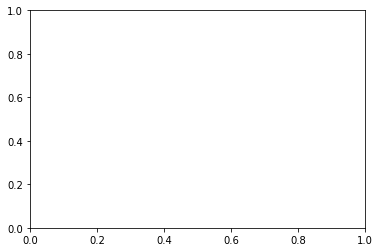

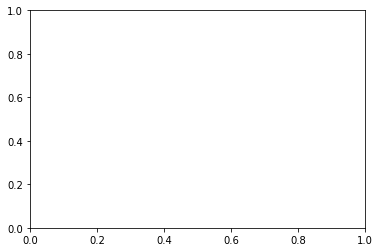

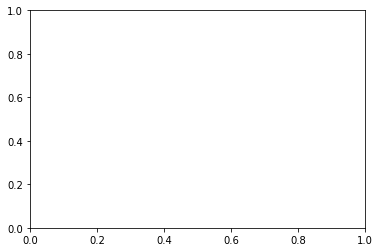

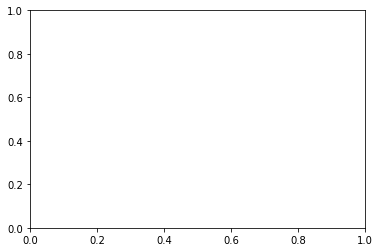

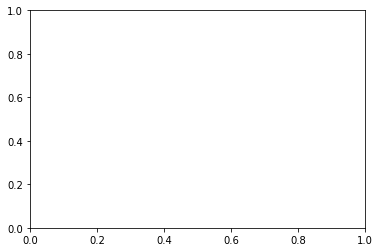

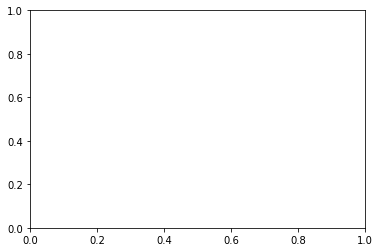

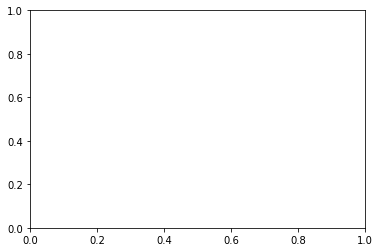

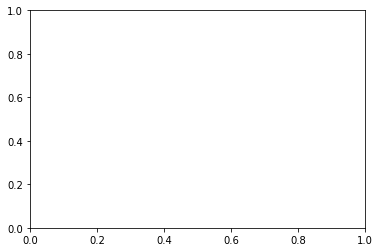

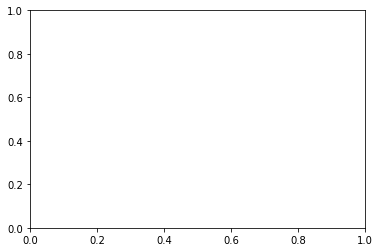

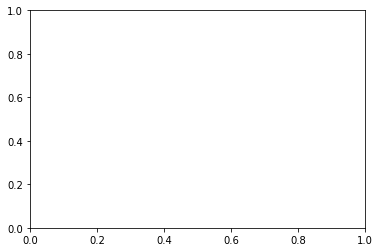

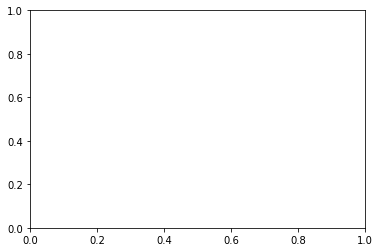

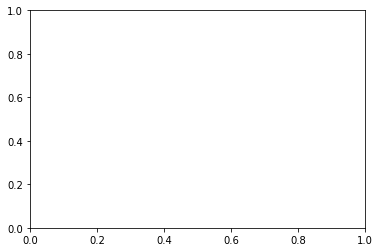

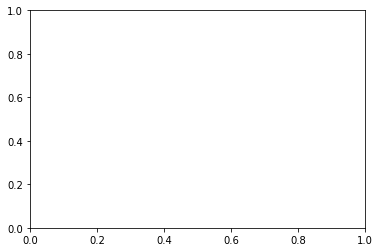

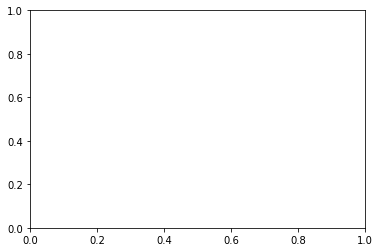

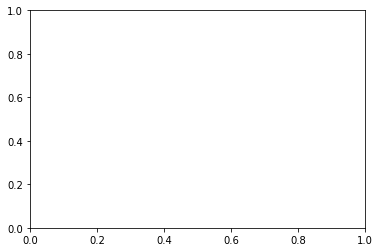

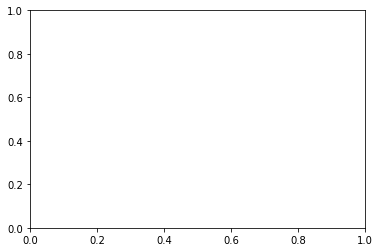

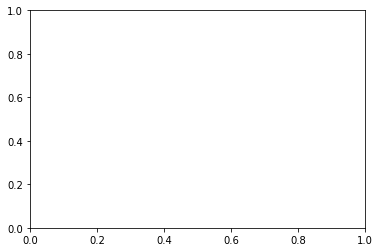

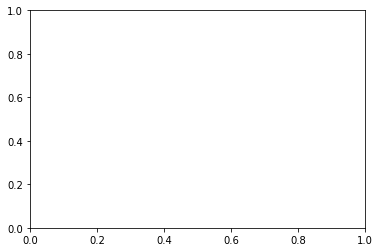

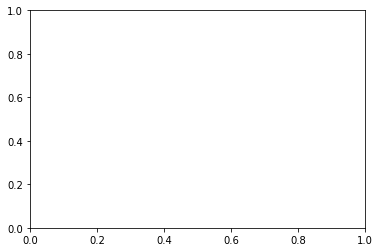

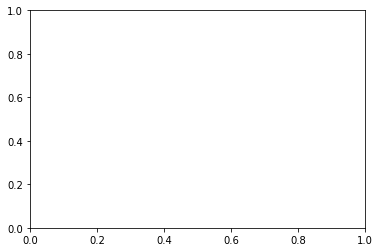

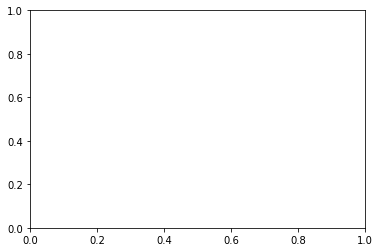

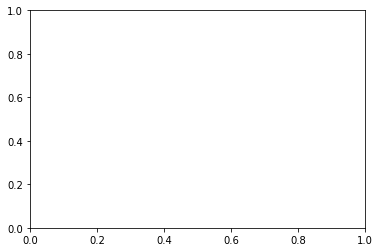

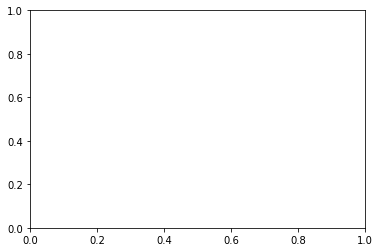

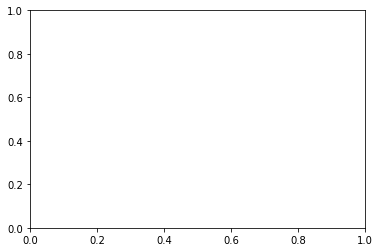

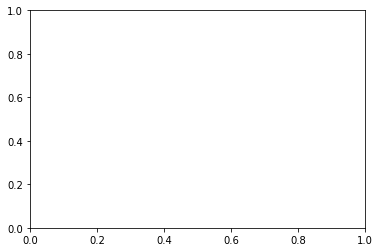

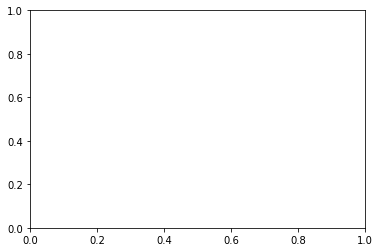

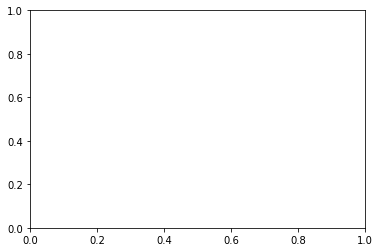

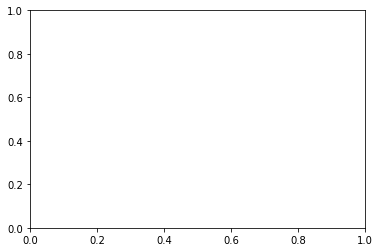

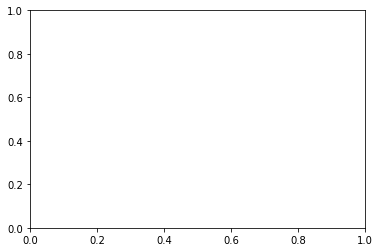

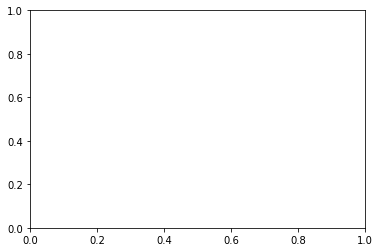

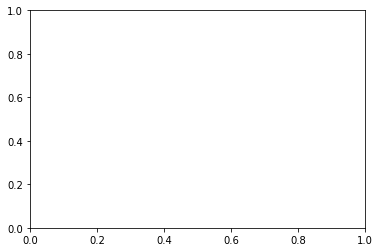

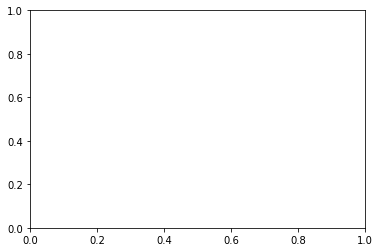

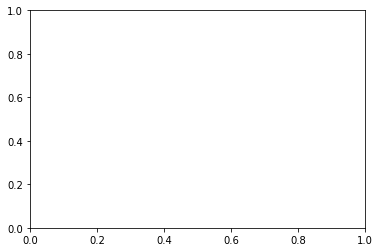

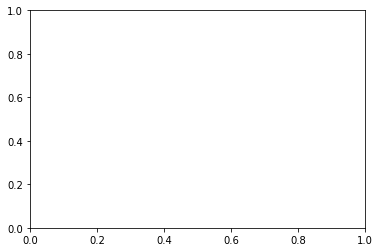

In [7]:
for col1, col2 in product(cols, repeat=2):
    if col1 == col2:
        continue
    with suppress(Exception):
        pd.DataFrame(boats.loc[:, (col1, col2)]).plot(type='p')
        plt.show()